In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pyFAI
from SACLA_XRD_functions import *
# import tifffile as tif
# %matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# From here should be the same
# fpd1_map = np.load('fpd1_map.npy')
fpd1_map = np.ones((1548, 2064))

# fpd1_mask = np.load('fpd1_mask.npy')
fpd1_mask = np.load('run_1620771_mask.npy')

fpd1_poni = pyFAI.load('run_1620787_7.065keV.poni')
# fpd1_PONI = pyFAI.load('fpd1_r35.poni')  # Put new poni files in here

In [19]:
# Number of scattering angle bins
npt_rad = 2000
# Number of azimuthal angle bins
npt_azim = 360
# Range for the integration in 2 theta or A^-1
radial_range = [1.5, 5]  # I suggest [0, 90] or [0,15] when changing units
# Range for the integration in azimuth
azim_range = [15, 160]
# Units of the integration    Either "2th_deg" or "q_A^-1"  You need to change the radial rangne values as well as the string below
units="q_A^-1"

pyFAI_dict = {}
pyFAI_dict['poni'], pyFAI_dict['mask'], pyFAI_dict['map'], pyFAI_dict['npt_rad'], pyFAI_dict['npt_azim'], pyFAI_dict['radial_range'], pyFAI_dict['azim_range'], pyFAI_dict['units'] = fpd1_poni, fpd1_mask, fpd1_map, npt_rad, npt_azim, radial_range, azim_range, units

In [20]:
processed_runs = {} # Run this cell once to set up cache.

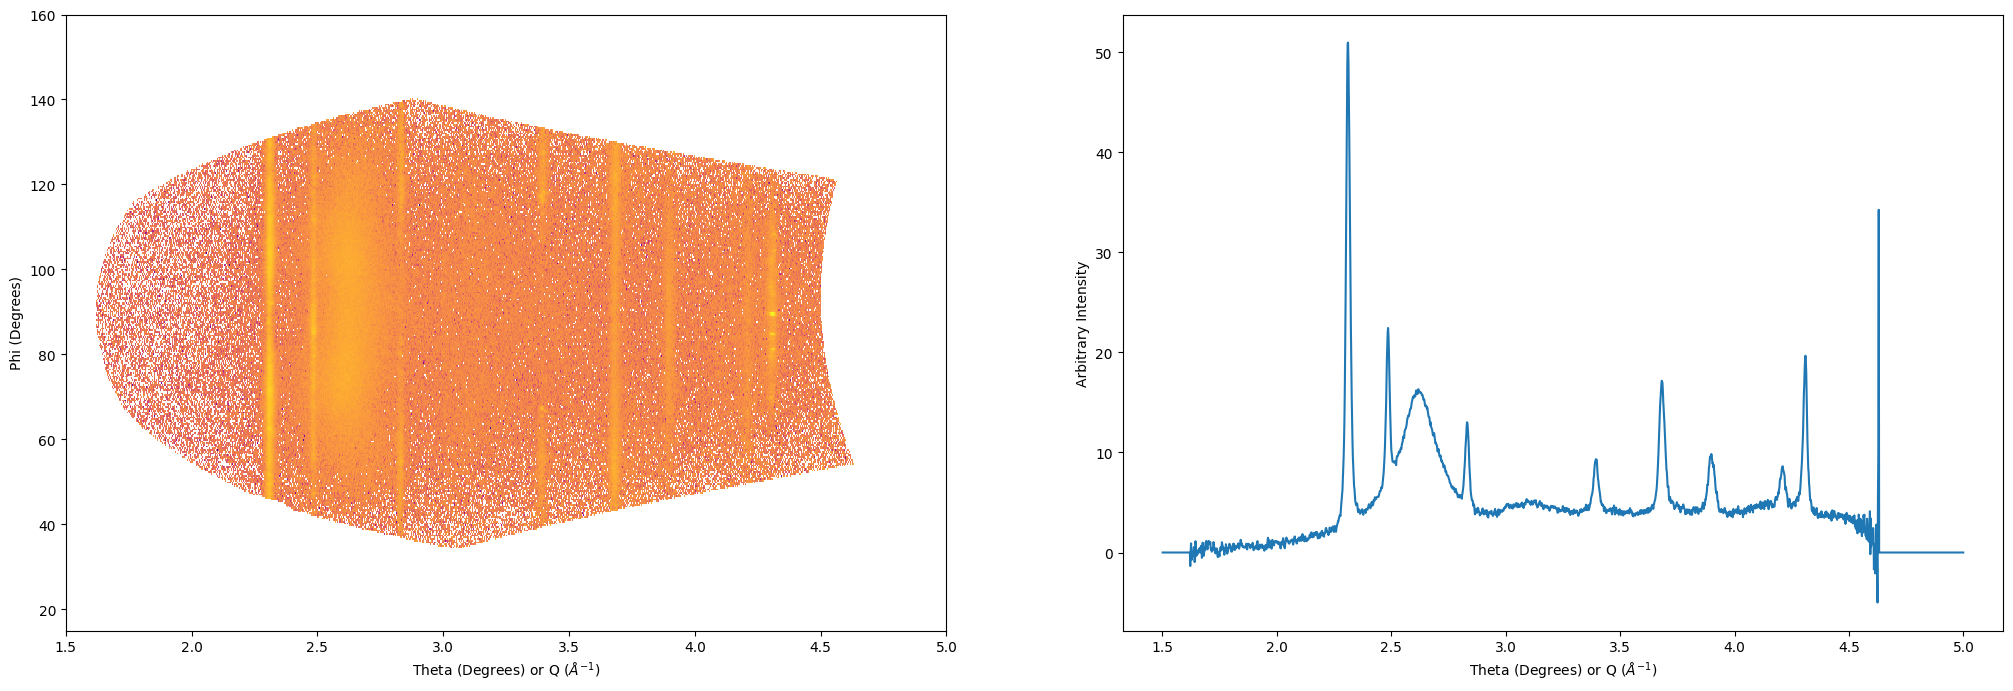

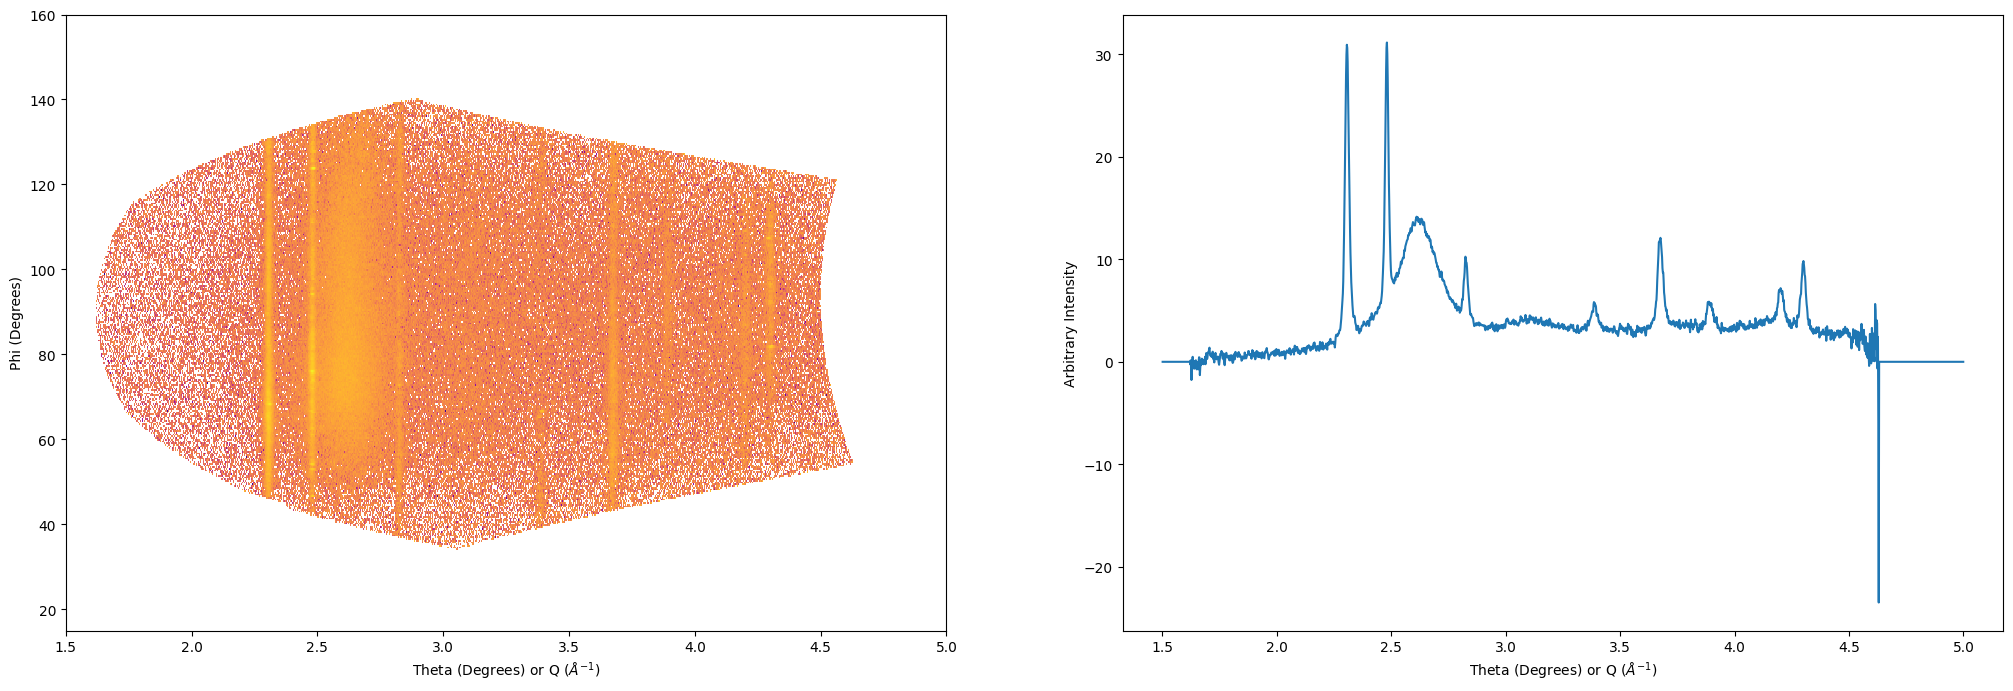

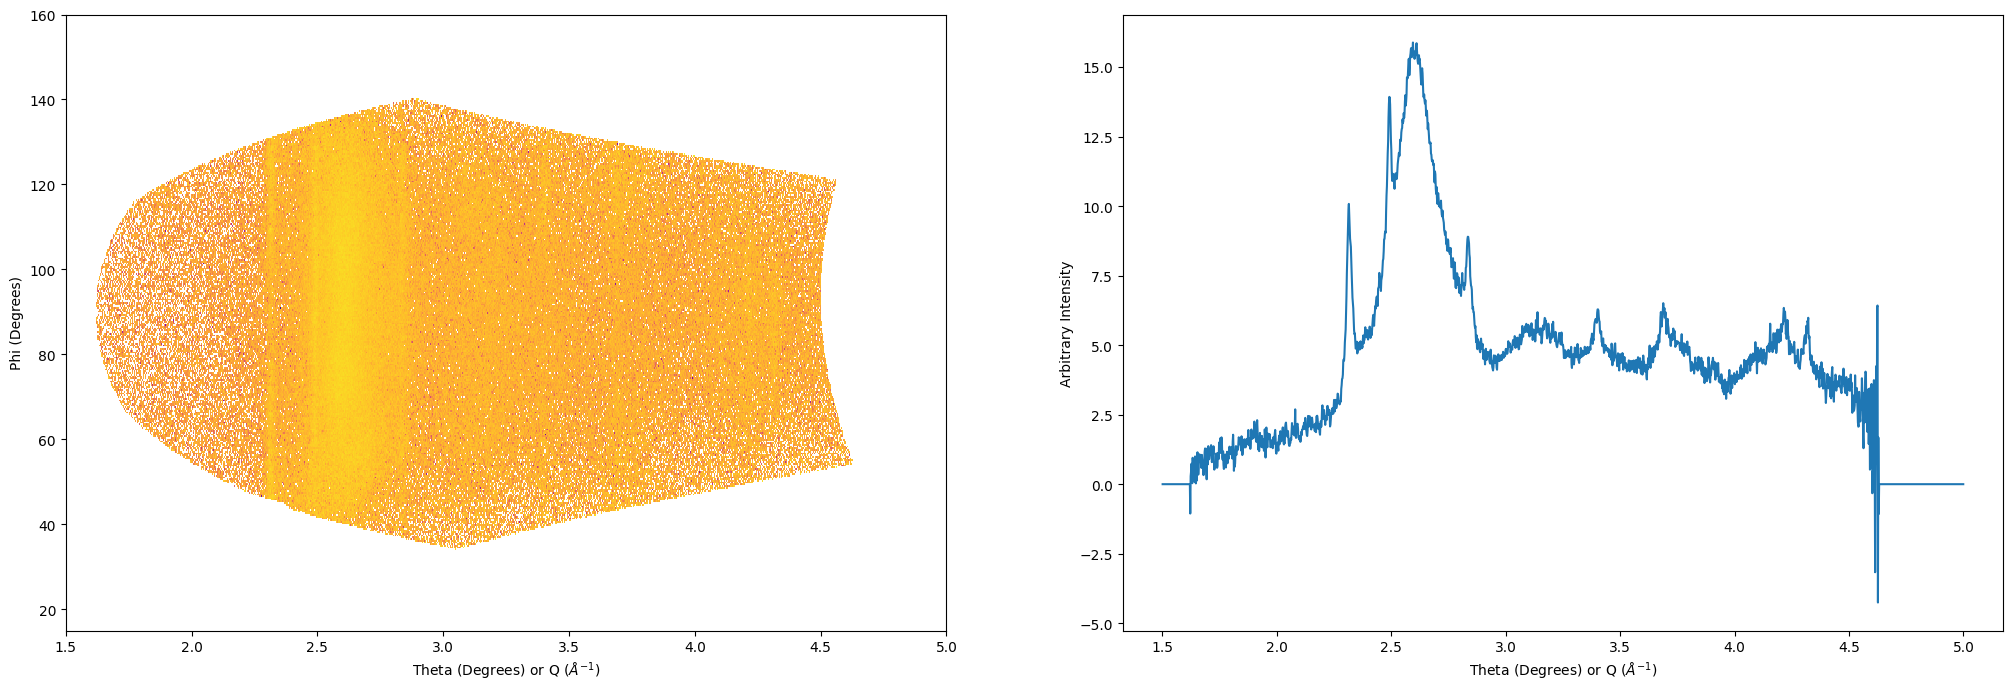

In [42]:
run_numbers = [1621282, 1621284, 1621286, 1621288, 1621290, 1621292, 1621294, 1621298, 1621300, 1621302, 1621304, 1621306,
               1621308, 1621310, 1621312, 1621314, 1621316, 1621318, 1621320, 1621322, 1621324, 1621326, 1621328, 1621330,
               1621332]
# Put the runs you consider to be good below, also include them above.
good_runs = [1621282]
processed_runs, new_runs, fpd1_INTs, fpd1_INTs_no_offset, fpd1_INT = process_many_for_waterfall(pyFAI_dict, processed_runs, run_numbers, good_runs, export=True, plot_good=True)

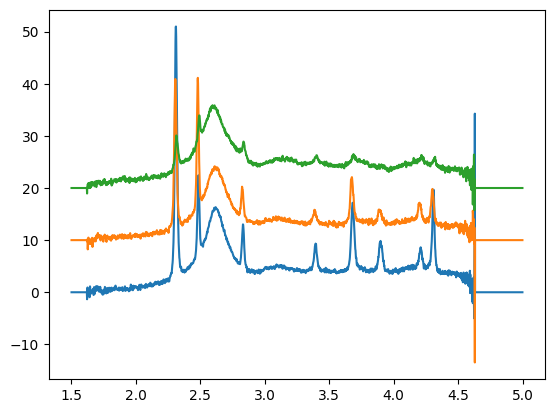

In [43]:
# Plotting just the good runs and new runs
count=0
offset=10
for run_number in good_runs:
    plt.plot(processed_runs[run_number]['INT'].radial, processed_runs[run_number]['INT'].intensity+count*offset)
    count+=1
for run_number in new_runs:
    plt.plot(processed_runs[run_number]['INT'].radial, processed_runs[run_number]['INT'].intensity+count*offset)
    count+=1

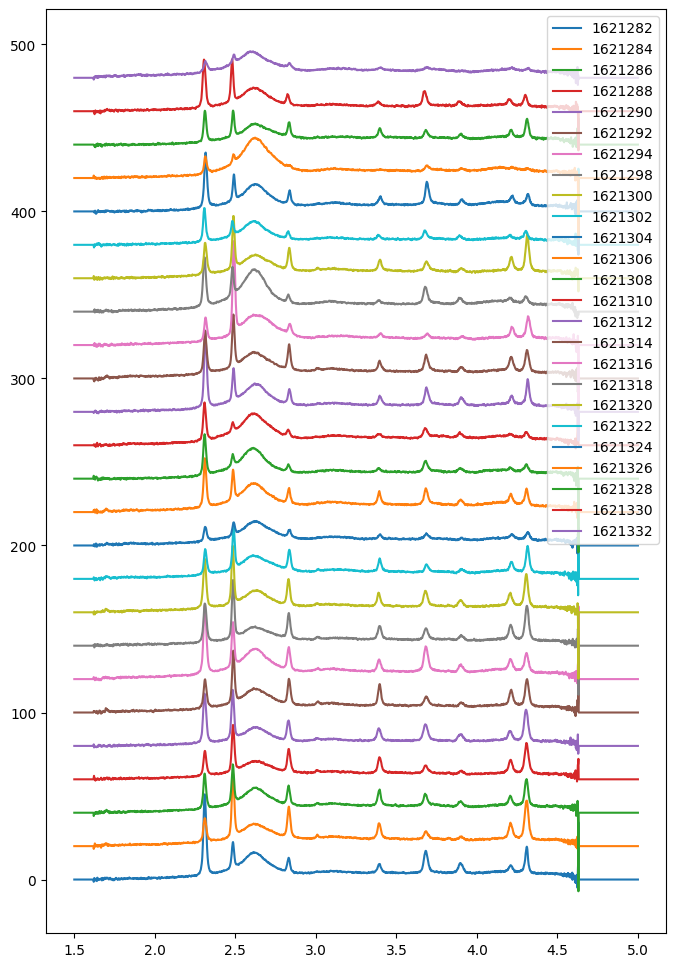

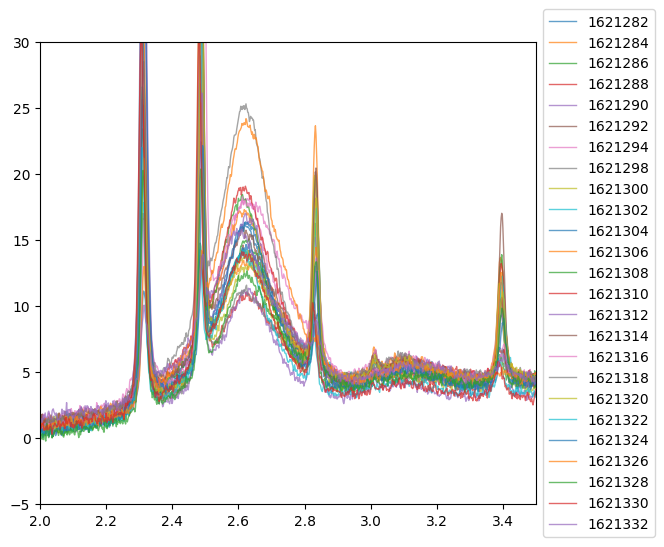

In [44]:
# Plotting all runs
plt.figure(figsize=(8,12))
plt.plot(fpd1_INT.radial, np.transpose(fpd1_INTs), label=run_numbers)
plt.legend()
plt.show()
# Plotting all runs
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

ax.plot(fpd1_INT.radial, np.transpose(fpd1_INTs_no_offset), label=run_numbers, alpha=0.7, linewidth=1)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_ylim(-5, 30)
ax.set_xlim(2, 3.5)

plt.show()